In [1]:
from __future__ import division, print_function
# from . import *
import numpy as np
import array as arr
import matplotlib.pyplot as plt
# import sympy as sp
from scipy import optimize
from matplotlib.backends.backend_pdf import PdfPages
from scipy.misc import derivative as d
from scipy.integrate import solve_ivp,odeint,quadrature,quad
from matplotlib.colors import LogNorm, SymLogNorm
import matplotlib.animation as animation
from mpl_toolkits.mplot3d import Axes3D
# import astropy.units as un
from scipy.interpolate import splprep, splev
# import astropy.constants as const
import importlib
# from autograd import elementwise_grad as egrad
# import openmesh as om
import numpy as np
%matplotlib notebook

In [2]:
%load_ext autoreload
%autoreload 2

# Openmesh

In [4]:
dir(om)

['BaseHandle',
 'EdgeHandle',
 'EdgeIter',
 'FaceEdgeIter',
 'FaceFaceIter',
 'FaceHalfedgeIter',
 'FaceHandle',
 'FaceIter',
 'FaceVertexIter',
 'HalfedgeHandle',
 'HalfedgeIter',
 'HalfedgeLoopIter',
 'PolyMesh',
 'PolyMeshDecimater',
 'PolyMeshModAspectRatio',
 'PolyMeshModAspectRatioHandle',
 'PolyMeshModBase',
 'PolyMeshModEdgeLength',
 'PolyMeshModEdgeLengthHandle',
 'PolyMeshModHausdorff',
 'PolyMeshModHausdorffHandle',
 'PolyMeshModIndependentSets',
 'PolyMeshModIndependentSetsHandle',
 'PolyMeshModNormalDeviation',
 'PolyMeshModNormalDeviationHandle',
 'PolyMeshModNormalFlipping',
 'PolyMeshModNormalFlippingHandle',
 'PolyMeshModProgMesh',
 'PolyMeshModProgMeshHandle',
 'PolyMeshModProgMeshInfo',
 'PolyMeshModQuadric',
 'PolyMeshModQuadricHandle',
 'PolyMeshModRoundness',
 'PolyMeshModRoundnessHandle',
 'TriMesh',
 'TriMeshDecimater',
 'TriMeshModAspectRatio',
 'TriMeshModAspectRatioHandle',
 'TriMeshModBase',
 'TriMeshModEdgeLength',
 'TriMeshModEdgeLengthHandle',
 'TriMeshMo

In [3]:
mesh = om.Thimble2DTriMesh()

AttributeError: module 'openmesh' has no attribute 'Thimble2DTriMesh'

In [4]:
dir(mesh)

['InvalidEdgeHandle',
 'InvalidFaceHandle',
 'InvalidHalfedgeHandle',
 'InvalidVertexHandle',
 '__class__',
 '__copy__',
 '__deepcopy__',
 '__delattr__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 'add_face',
 'add_vertex',
 'adjust_outgoing_halfedge',
 'assign_connectivity',
 'calc_dihedral_angle',
 'calc_dihedral_angle_fast',
 'calc_edge_length',
 'calc_edge_sqr_length',
 'calc_edge_vector',
 'calc_face_centroid',
 'calc_face_normal',
 'calc_halfedge_normal',
 'calc_sector_angle',
 'calc_sector_area',
 'calc_sector_normal',
 'calc_sector_vectors',
 'calc_vertex_normal',
 'calc_vertex_normal_correct',
 'calc_vertex_normal_fast',
 'calc_vertex_normal_loop',
 'ccw_rotated_halfedge_handle',
 'clean',
 'clear',
 'collapse',


In [5]:
vh0 = mesh.add_vertex(np.array([0, 0, 0, 1]))
vh1 = mesh.add_vertex([2, 0, 0, 2])
vh2 = mesh.add_vertex([1, 1, 0, 3])
vh3 = mesh.add_vertex([1,-1, 0, 4])

In [6]:
dir(om)

['BaseHandle',
 'EdgeHandle',
 'EdgeIter',
 'FaceEdgeIter',
 'FaceFaceIter',
 'FaceHalfedgeIter',
 'FaceHandle',
 'FaceIter',
 'FaceVertexIter',
 'HalfedgeHandle',
 'HalfedgeIter',
 'HalfedgeLoopIter',
 'PolyMesh',
 'PolyMeshDecimater',
 'PolyMeshModAspectRatio',
 'PolyMeshModAspectRatioHandle',
 'PolyMeshModBase',
 'PolyMeshModEdgeLength',
 'PolyMeshModEdgeLengthHandle',
 'PolyMeshModHausdorff',
 'PolyMeshModHausdorffHandle',
 'PolyMeshModIndependentSets',
 'PolyMeshModIndependentSetsHandle',
 'PolyMeshModNormalDeviation',
 'PolyMeshModNormalDeviationHandle',
 'PolyMeshModNormalFlipping',
 'PolyMeshModNormalFlippingHandle',
 'PolyMeshModProgMesh',
 'PolyMeshModProgMeshHandle',
 'PolyMeshModProgMeshInfo',
 'PolyMeshModQuadric',
 'PolyMeshModQuadricHandle',
 'PolyMeshModRoundness',
 'PolyMeshModRoundnessHandle',
 'TriMesh',
 'TriMeshDecimater',
 'TriMeshModAspectRatio',
 'TriMeshModAspectRatioHandle',
 'TriMeshModBase',
 'TriMeshModEdgeLength',
 'TriMeshModEdgeLengthHandle',
 'TriMeshMo

In [7]:
fh0 = mesh.add_face(vh0, vh1, vh2)
fh1 = mesh.add_face(vh1, vh0, vh3)

In [8]:
mesh.point(vh0)

array([0., 0., 0.])

In [37]:
mesh.face_vertex_indices()

array([[0, 1, 2],
       [1, 0, 3]], dtype=int32)

# Delaunay

In [88]:
from scipy.spatial import Delaunay

In [89]:
points = np.array([[0, 0], [1, 0.5], [1, 0.75], [1, 0], [1, 1]])
points.shape

(5, 2)

In [90]:
tri = Delaunay(points,incremental=True)
tri.points4d = np.hstack((tri.points,np.zeros((5,2))))

In [91]:
tri.points4d

array([[0.  , 0.  , 0.  , 0.  ],
       [1.  , 0.5 , 0.  , 0.  ],
       [1.  , 0.75, 0.  , 0.  ],
       [1.  , 0.  , 0.  , 0.  ],
       [1.  , 1.  , 0.  , 0.  ]])

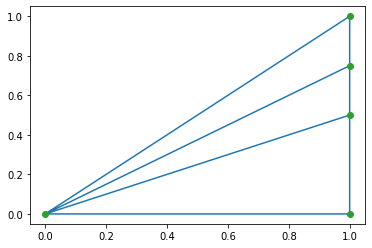

In [92]:
plt.figure()
plt.triplot(points[:,0], points[:,1], tri.simplices)
plt.plot(points[:,0], points[:,1], 'o')

In [69]:
tri.add_points(np.array([[1,0.5]]))

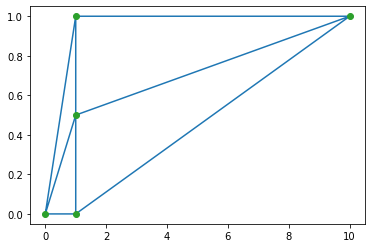

In [70]:
plt.figure()
plt.triplot(tri.points[:,0], tri.points[:,1], tri.simplices)
plt.plot(tri.points[:,0], tri.points[:,1], 'o')

In [71]:
tri.add_points(np.array([[1,0.75]]))

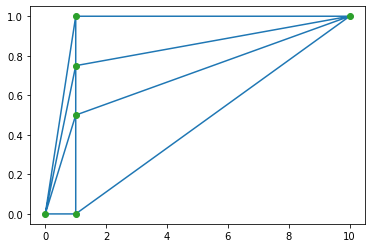

In [72]:
plt.figure()
plt.triplot(tri.points[:,0], tri.points[:,1], tri.simplices)
plt.plot(tri.points[:,0], tri.points[:,1], 'o')

In [78]:
%%timeit
Delaunay(np.random.randn(1000,2))

5.47 ms ± 458 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [128]:
points = np.zeros((100,2))
for i in range(10):
    for j in range(10):
        points[i*10+j][0] = i
        points[i*10+j][1] = j

In [131]:
tri = Delaunay(points,incremental=True)

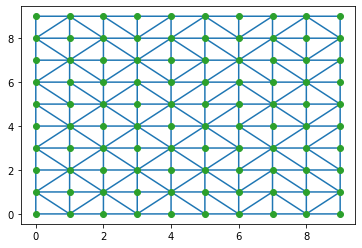

In [132]:
plt.figure()
plt.triplot(tri.points[:,0], tri.points[:,1], tri.simplices)
plt.plot(tri.points[:,0], tri.points[:,1], 'o')

In [175]:
points = np.vstack((np.arange(0,10,1),np.zeros(10))).T
right = np.array([np.cos(60*np.pi/180),np.sin(60*np.pi/180)])
left = np.array([-np.cos(60*np.pi/180),np.sin(60*np.pi/180)])

In [176]:
points = np.vstack((points,points+right,points+right+left,points+2*right+left,points+2*right+2*left))

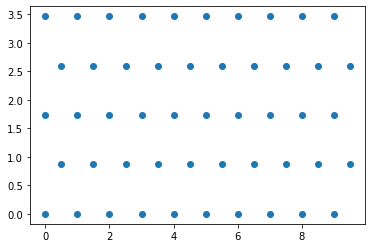

In [178]:
plt.figure()
plt.plot(points[:,0], points[:,1], 'o')

In [206]:
tri = Delaunay(points,incremental=True)
tri.add_points(np.array([[1,np.sin(60*np.pi/180)]]))
tri.add_points(np.array([[(1+1.5)/2,np.sin(60*np.pi/180)]]))
tri.add_points(np.array([[(1+(1+1.5)/2)/2,np.sin(60*np.pi/180)]]))
tri.add_points(np.array([[(1+(1+(1+1.5)/2)/2)/2,np.sin(60*np.pi/180)]]))

<IPython.core.display.Javascript object>


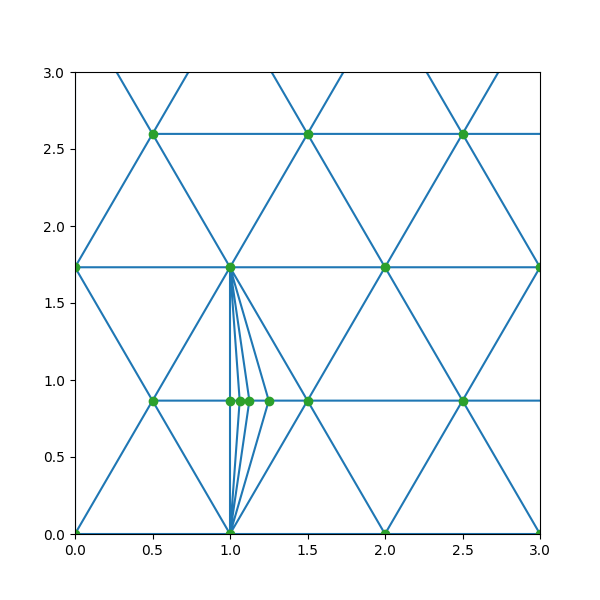

(0, 3)

In [207]:
plt.figure(figsize=(6,6))
plt.triplot(tri.points[:,0], tri.points[:,1], tri.simplices)
plt.plot(tri.points[:,0], tri.points[:,1], 'o')
plt.xlim(0,3)
plt.ylim(0,3)

In [208]:
tri.simplices

array([[38, 39, 49],
       [21, 11, 22],
       [21, 30, 20],
       [20, 30, 40],
       [39, 29, 19],
       [38, 29, 39],
       [26, 16, 27],
       [ 2, 11,  1],
       [ 1, 10,  0],
       [10, 20,  0],
       [10, 21, 20],
       [30, 41, 40],
       [23, 32, 22],
       [32, 23, 33],
       [48, 38, 49],
       [36, 26, 27],
       [18,  8,  9],
       [18,  9, 19],
       [29, 18, 19],
       [ 7, 16,  6],
       [44, 34, 45],
       [34, 44, 33],
       [44, 43, 33],
       [32, 43, 42],
       [43, 32, 33],
       [31, 21, 22],
       [31, 30, 21],
       [31, 32, 42],
       [32, 31, 22],
       [41, 31, 42],
       [31, 41, 30],
       [ 4,  5, 14],
       [15, 16, 26],
       [15, 26, 25],
       [14, 15, 25],
       [16, 15,  6],
       [15,  5,  6],
       [ 5, 15, 14],
       [ 2, 12, 11],
       [12,  2,  3],
       [11, 12, 22],
       [12, 23, 22],
       [46, 36, 47],
       [37, 48, 47],
       [48, 37, 38],
       [37, 36, 27],
       [36, 37, 47],
       [18, 1

# 2D

In [620]:
import numpy as np
from plind.plmodel import plmodel
from plind.contour_dict import equilateral_real#, gaussian_random
from plind.contour import contour as ct
import matplotlib.pyplot as plt
import matplotlib.tri as mtri

In [621]:
%load_ext line_profiler

The line_profiler extension is already loaded. To reload it, use:
  %reload_ext line_profiler


In [622]:
def Gaussexp(z, lamb):
    return 1j*lamb*np.dot(z,z)

def gradh(z, lamb):
    return np.conj(-2*1j*lamb*z)

# def ptlens(z, lamb):
#     return 1j*lamb*((z[0]**2+z[1]**2)-1/(1+z[0]**2+2*z[1]**2))

# def gradh(z, lamb):
#     return 1j*lamb*(np.conj(z)-(1/(1+z[:,0].conj()**2+2*z[:,1].conj()**2)[:,np.newaxis])**2*np.concatenate((2*z[:,0,np.newaxis].conj(),4*z[:,1,np.newaxis]),axis=-1))

def answer(lamb):
    return np.pi*1j/lamb

In [623]:
# init model
lamb = -1.2+1.5j
delta = 0.5
Nstep = 30 #39
dt = 0.1
small = -30

contour = equilateral_real(15, (-2,2,-2,2))
# contour = ct()
# contour.init_contour(np.random.randn(500,2))
# contour.init_contour(np.random.uniform(low=-1,high=1,size=(1000,2)))
# contour.points[:,1] = contour.points[:,1]#+0.00005*(np.random.randn(900))
# contour.points[:,0] = contour.points[:,0]#+0.00005*(np.random.randn(900))

plind = plmodel(contour, Gaussexp, grad=gradh, expargs=[lamb])

In [625]:
# %lprun -f contour.split_edges plind.descend(dt, Nstep, delta, small)
plind.descend(dt, Nstep, delta, small)
plind.integrate()

(1.2770701831236093-1.0216561464988905j) (1.2770701843860948-1.021656147508876j)


In [613]:
plind.contour.refine_edges(delta/5)

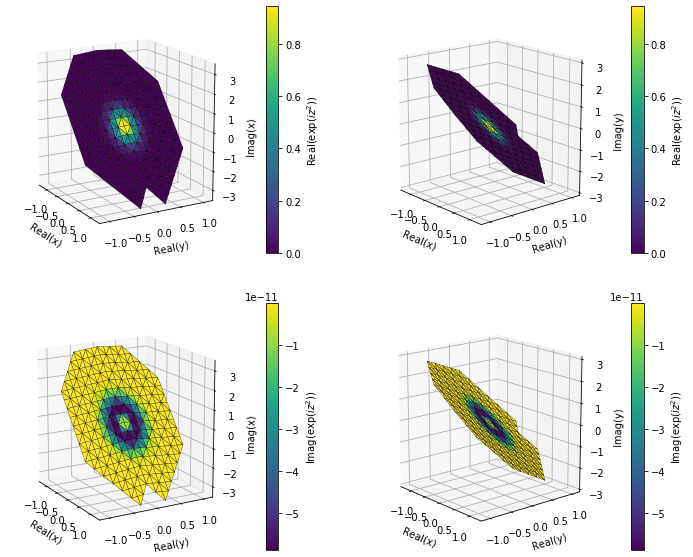

In [614]:
plind.intfun = plind.get_intfun()
xs = np.real(plind.contour.points[:,0])
ys = np.real(plind.contour.points[:,1])
intvals = np.array([plind.intfun(p, lamb) for p in plind.contour.points])
simpvals = np.zeros(plind.contour.simplices.shape[0],dtype=np.complex)
for j, simp in enumerate(plind.contour.simplices):
    mid = np.sum(plind.contour.points[simp], 0)/len(simp)
    simpvals[j] = plind.intfun(mid, *plind.expargs)

fig = plt.figure(figsize=(12,10))
ax0 = fig.add_subplot(2, 2, 1, projection='3d')
ax0.set_xlabel('Real(x)')
ax0.set_ylabel('Real(y)')
ax0.set_zlabel('Imag(x)')
ax0.view_init(elev=15,azim=-30)
col0 = ax0.plot_trisurf(xs, ys, plind.contour.points[:,0].imag, triangles=plind.contour.simplices, cmap=plt.cm.viridis,edgecolors='k',linewidths=0.3)
col0.set_array(simpvals.real)
cbar0 = fig.colorbar(col0,pad=0.1,label=r'Real($\exp(iz^2)$)')
ax1 = fig.add_subplot(2, 2, 2, projection='3d')
ax1.set_xlabel('Real(x)')
ax1.set_ylabel('Real(y)')
ax1.set_zlabel('Imag(y)')
ax1.view_init(elev=15,azim=-40)
col1 = ax1.plot_trisurf(xs, ys, plind.contour.points[:,1].imag, triangles=plind.contour.simplices, cmap=plt.cm.viridis,edgecolors='k',linewidths=0.3)
col1.set_array(simpvals.real)
cbar1 = fig.colorbar(col1,pad=0.1,label=r'Real($\exp(iz^2)$)')
ax2 = fig.add_subplot(2, 2, 3, projection='3d')
ax2.set_xlabel('Real(x)')
ax2.set_ylabel('Real(y)')
ax2.set_zlabel('Imag(x)')
ax2.view_init(elev=15,azim=-30)
col2 = ax2.plot_trisurf(xs, ys, plind.contour.points[:,0].imag, triangles=plind.contour.simplices, cmap=plt.cm.viridis,edgecolors='k',linewidths=0.3)
col2.set_array(simpvals.imag)
cbar2= fig.colorbar(col2,pad=0.1,label=r'Imag($\exp(iz^2)$)')
ax3 = fig.add_subplot(2, 2, 4, projection='3d')
ax3.set_xlabel('Real(x)')
ax3.set_ylabel('Real(y)')
ax3.set_zlabel('Imag(y)')
ax3.view_init(elev=15,azim=-40)
col3 = ax3.plot_trisurf(xs, ys, plind.contour.points[:,1].imag, triangles=plind.contour.simplices, cmap=plt.cm.viridis,edgecolors='k',linewidths=0.3)
col3.set_array(simpvals.imag)
cbar3=fig.colorbar(col3,pad=0.1,label=r'Imag($\exp(iz^2)$)')

In [612]:
def animate_func(i):
    print(i)
    xs = np.real(plind.trajectory[i].points[:,0])
    ys = np.real(plind.trajectory[i].points[:,1])
    intvals = np.array([intfun(p, lamb) for p in plind.trajectory[i].points])
    simpvals = np.zeros(plind.trajectory[i].simplices.shape[0],dtype=np.complex)
    for j, simp in enumerate(plind.trajectory[i].simplices):
        mid = np.sum(plind.trajectory[i].points[simp], 0)/len(simp)
        simpvals[j] = intfun(mid, *plind.expargs)

    fig.clear()
    ax0 = fig.add_subplot(2, 2, 1, projection='3d')
    ax0.set_xlabel('Real(x)')
    ax0.set_ylabel('Real(y)')
    ax0.set_zlabel('Imag(x)')
    ax0.set_xlim(-2,2)
    ax0.set_ylim(-2,2)
    ax0.set_zlim(-2,2)
    ax0.view_init(elev=15,azim=-30)
    col0 = ax0.plot_trisurf(xs, ys, plind.trajectory[i].points[:,0].imag, triangles=plind.trajectory[i].simplices, cmap=plt.cm.viridis,edgecolors='k',linewidths=0.3)
    col0.set_array(simpvals.real)
    cbar0 = fig.colorbar(col0,pad=0.1,label=r'Real($\exp(iz^2)$)')
    ax1 = fig.add_subplot(2, 2, 2, projection='3d')
    ax1.set_xlabel('Real(x)')
    ax1.set_ylabel('Real(y)')
    ax1.set_zlabel('Imag(y)')
    ax1.set_xlim(-2,2)
    ax1.set_ylim(-2,2)
    ax1.set_zlim(-2,2)
    ax1.view_init(elev=15,azim=-40)
    col1 = ax1.plot_trisurf(xs, ys, plind.trajectory[i].points[:,1].imag, triangles=plind.trajectory[i].simplices, cmap=plt.cm.viridis,edgecolors='k',linewidths=0.3)
    col1.set_array(simpvals.real)
    cbar1 = fig.colorbar(col1,pad=0.1,label=r'Real($\exp(iz^2)$)')
    ax2 = fig.add_subplot(2, 2, 3, projection='3d')
    ax2.set_xlabel('Real(x)')
    ax2.set_ylabel('Real(y)')
    ax2.set_zlabel('Imag(x)')
    
    ax2.set_xlim(-2,2)
    ax2.set_ylim(-2,2)
    ax2.set_zlim(-2,2)
    ax2.view_init(elev=15,azim=-30)
    col2 = ax2.plot_trisurf(xs, ys, plind.trajectory[i].points[:,0].imag, triangles=plind.trajectory[i].simplices, cmap=plt.cm.viridis,edgecolors='k',linewidths=0.3)
    col2.set_array(simpvals.imag)
    cbar2= fig.colorbar(col2,pad=0.1,label=r'Imag($\exp(iz^2)$)')
    ax3 = fig.add_subplot(2, 2, 4, projection='3d')
    ax3.set_xlabel('Real(x)')
    ax3.set_ylabel('Real(y)')
    ax3.set_zlabel('Imag(y)')
    ax3.set_xlim(-2,2)
    ax3.set_ylim(-2,2)
    ax3.set_zlim(-2,2)
    ax3.view_init(elev=15,azim=-40)
    col3 = ax3.plot_trisurf(xs, ys, plind.trajectory[i].points[:,1].imag, triangles=plind.trajectory[i].simplices, cmap=plt.cm.viridis,edgecolors='k',linewidths=0.3)
    col3.set_array(simpvals.imag)
    cbar3=fig.colorbar(col3,pad=0.1,label=r'Imag($\exp(iz^2)$)')
    return col0,col1,col2,col3

In [225]:
def init():
    col0.set_array([])
    col1.set_array([])
    col2.set_array([])
    col3.set_array([])
    return col0,col1,col2,col3

In [227]:
fps=12
anim = animation.FuncAnimation(
                                fig,
                                animate_func,
                                init_func=init,
                                frames = len(plind.trajectory),
                                interval = 1000 / fps, # in ms,
                                repeat_delay=0,
                                blit=False
                               )
anim.save('./blob_lens.gif', writer='imagemagick')

MovieWriter imagemagick unavailable; trying to use <class 'matplotlib.animation.PillowWriter'> instead.


0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174


In [1482]:
dir(cbar0)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_add_solids',
 '_boundaries',
 '_central_N',
 '_config_axes',
 '_edges',
 '_extend_lower',
 '_extend_upper',
 '_extended_N',
 '_find_range',
 '_get_extension_lengths',
 '_get_ticker_locator_formatter',
 '_inside',
 '_label',
 '_labelkw',
 '_locate',
 '_manual_tick_data_values',
 '_mesh',
 '_outline',
 '_patch_ax',
 '_process_values',
 '_proportional_y',
 '_reset_locator_formatter_scale',
 '_set_label',
 '_slice_dict',
 '_ticker',
 '_uniform_y',
 '_use_auto_colorbar_locator',
 '_values',
 '_y',
 'add_lines',
 'alpha',
 'ax',
 'boundaries',
 'cmap',
 'config_axis',
 'dividers',
 'draw_all',
 'drawedges',
 'extend',
 'exten

<IPython.core.display.Javascript object>


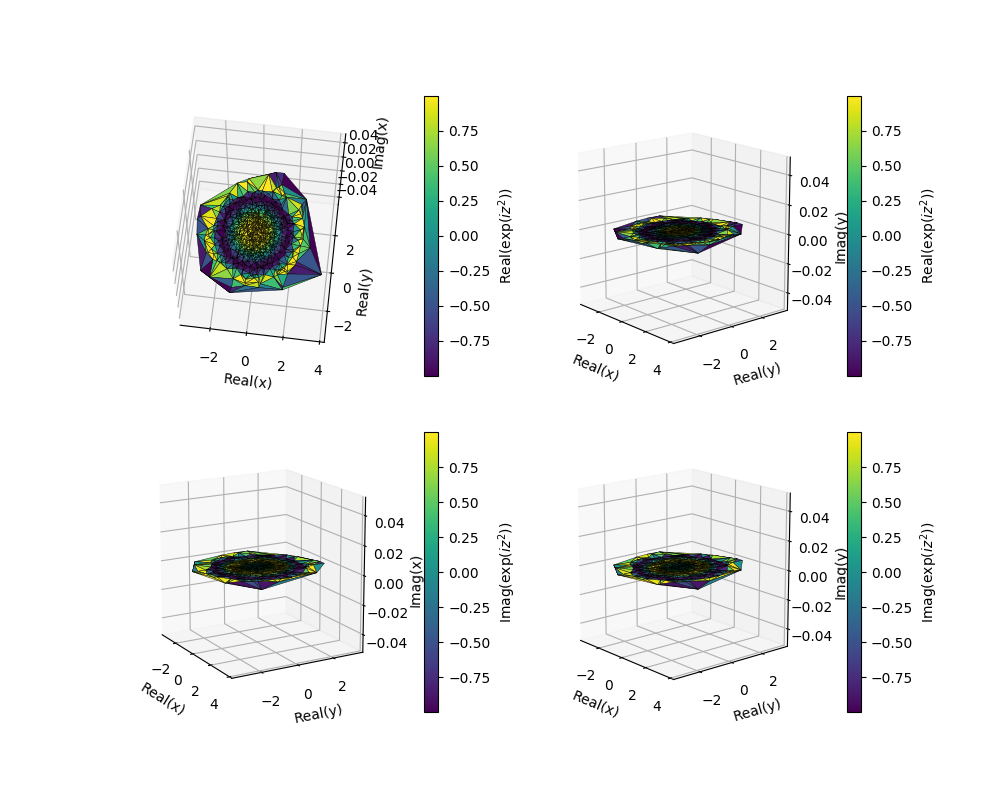

In [115]:
xs = np.real(plind.trajectory[0].points[:,0])
ys = np.real(plind.trajectory[0].points[:,1])
intvals = np.array([intfun(p, lamb) for p in plind.trajectory[0].points])
simpvals = np.zeros(plind.trajectory[0].simplices.shape[0],dtype=np.complex)
for j, simp in enumerate(plind.trajectory[0].simplices):
    mid = np.sum(plind.trajectory[0].points[simp], 0)/len(simp)
    simpvals[j] = intfun(mid, *plind.expargs)

fig = plt.figure(figsize=(10,8))
ax0 = fig.add_subplot(2, 2, 1, projection='3d')
ax0.set_xlabel('Real(x)')
ax0.set_ylabel('Real(y)')
ax0.set_zlabel('Imag(x)')
ax0.view_init(elev=15,azim=-30)
col0 = ax0.plot_trisurf(xs, ys, plind.trajectory[0].points[:,0].imag, triangles=plind.trajectory[0].simplices, cmap=plt.cm.viridis,edgecolors='k',linewidths=0.3)
col0.set_array(simpvals.real)
fig.colorbar(col0,pad=0.1,label=r'Real($\exp(iz^2)$)')
ax1 = fig.add_subplot(2, 2, 2, projection='3d')
ax1.set_xlabel('Real(x)')
ax1.set_ylabel('Real(y)')
ax1.set_zlabel('Imag(y)')
ax1.view_init(elev=15,azim=-40)
col1 = ax1.plot_trisurf(xs, ys, plind.trajectory[0].points[:,1].imag, triangles=plind.trajectory[0].simplices, cmap=plt.cm.viridis,edgecolors='k',linewidths=0.3)
col1.set_array(simpvals.real)
fig.colorbar(col1,pad=0.1,label=r'Real($\exp(iz^2)$)')
ax2 = fig.add_subplot(2, 2, 3, projection='3d')
ax2.set_xlabel('Real(x)')
ax2.set_ylabel('Real(y)')
ax2.set_zlabel('Imag(x)')
ax2.view_init(elev=15,azim=-30)
col2 = ax2.plot_trisurf(xs, ys, plind.trajectory[0].points[:,0].imag, triangles=plind.trajectory[0].simplices, cmap=plt.cm.viridis,edgecolors='k',linewidths=0.3)
col2.set_array(simpvals.imag)
fig.colorbar(col2,pad=0.1,label=r'Imag($\exp(iz^2)$)')
ax3 = fig.add_subplot(2, 2, 4, projection='3d')
ax3.set_xlabel('Real(x)')
ax3.set_ylabel('Real(y)')
ax3.set_zlabel('Imag(y)')
ax3.view_init(elev=15,azim=-40)
col3 = ax3.plot_trisurf(xs, ys, plind.trajectory[0].points[:,1].imag, triangles=plind.trajectory[0].simplices, cmap=plt.cm.viridis,edgecolors='k',linewidths=0.3)
col3.set_array(simpvals.imag)
fig.colorbar(col3,pad=0.1,label=r'Imag($\exp(iz^2)$)')

In [34]:
intfun = plind.get_intfun()
xs = np.real(plind.trajectory[i].points[:,0])
ys = np.real(plind.trajectory[i].points[:,1])
intvals = np.array([intfun(p, lamb) for p in plind.trajectory[i].points])
simpvals = np.zeros(plind.trajectory[i].simplices.shape[0],dtype=np.complex)
for j, simp in enumerate(plind.trajectory[i].simplices):
    mid = np.sum(plind.trajectory[i].points[simp], 0)/len(simp)
    simpvals[j] = intfun(mid, *plind.expargs)
fig = plt.figure(figsize=(10,8))
ax0 = fig.add_subplot(2, 2, 1, projection='3d')
ax0.set_xlabel('Real(x)')
ax0.set_ylabel('Real(y)')
ax0.set_zlabel('Imag(x)')
ax0.view_init(elev=15,azim=-30)
col0 = ax0.plot_trisurf(xs, ys, plind.trajectory[i].points[:,0].imag, triangles=plind.trajectory[i].simplices, cmap=plt.cm.viridis,edgecolors='k',linewidths=0.3)
col0.set_array(simpvals.real)
fig.colorbar(col0,pad=0.1,label=r'Real($\exp(iz^2)$)')
ax1 = fig.add_subplot(2, 2, 2, projection='3d')
ax1.set_xlabel('Real(x)')
ax1.set_ylabel('Real(y)')
ax1.set_zlabel('Imag(y)')
ax1.view_init(elev=15,azim=-40)
col1 = ax1.plot_trisurf(xs, ys, plind.trajectory[i].points[:,1].imag, triangles=plind.trajectory[i].simplices, cmap=plt.cm.viridis,edgecolors='k',linewidths=0.3)
col1.set_array(simpvals.real)
fig.colorbar(col1,pad=0.1,label=r'Real($\exp(iz^2)$)')
ax2 = fig.add_subplot(2, 2, 3, projection='3d')
ax2.set_xlabel('Real(x)')
ax2.set_ylabel('Real(y)')
ax2.set_zlabel('Imag(x)')
ax2.view_init(elev=15,azim=-30)
col2 = ax2.plot_trisurf(xs, ys, plind.trajectory[i].points[:,0].imag, triangles=plind.trajectory[i].simplices, cmap=plt.cm.viridis,edgecolors='k',linewidths=0.3)
col2.set_array(simpvals.imag)
fig.colorbar(col2,pad=0.1,label=r'Imag($\exp(iz^2)$)')
ax3 = fig.add_subplot(2, 2, 4, projection='3d')
ax3.set_xlabel('Real(x)')
ax3.set_ylabel('Real(y)')
ax3.set_zlabel('Imag(y)')
ax3.view_init(elev=15,azim=-40)
col3 = ax3.plot_trisurf(xs, ys, plind.trajectory[i].points[:,1].imag, triangles=plind.trajectory[i].simplices, cmap=plt.cm.viridis,edgecolors='k',linewidths=0.3)
col3.set_array(simpvals.imag)
fig.colorbar(col3,pad=0.1,label=r'Imag($\exp(iz^2)$)')

NameError: name 'i' is not defined

<IPython.core.display.Javascript object>


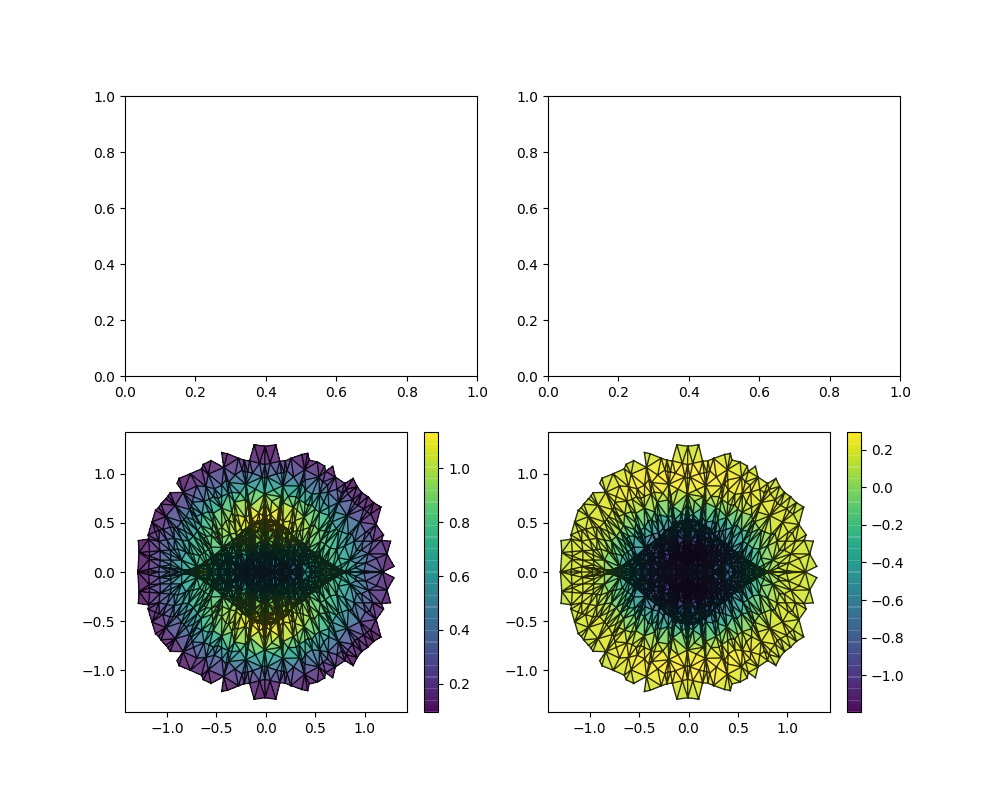

In [190]:
intfun = plind.get_intfun()
xs = np.real(plind.contour.points[:,0])
ys = np.real(plind.contour.points[:,1])
intvals = np.array([intfun(p, lamb) for p in plind.contour.points])
simpvals = np.zeros(plind.contour.simplices.shape[0],dtype=np.complex)
for i, simp in enumerate(plind.contour.simplices):
    mid = np.sum(plind.contour.points[simp], 0)/len(simp)
    simpvals[i] = intfun(mid, *plind.expargs)
plt.subplots(figsize=(10,8))
plt.subplot(221)

plt.subplot(222)

plt.subplot(223)
# plt.scatter(xs, ys, c=intvals.real, norm=SymLogNorm(1e-3))
plt.triplot(xs,ys,plind.contour.simplices, alpha=0.8,color='k',lw=1)
plt.tripcolor(xs,ys,plind.contour.simplices,facecolors=simpvals.real, alpha=0.8)
plt.colorbar()

plt.subplot(224)
plt.triplot(xs,ys,plind.contour.simplices, alpha=0.8,color='k',lw=1)
plt.tripcolor(xs,ys,plind.contour.simplices,facecolors=simpvals.imag, alpha=0.8)
plt.colorbar()

<IPython.core.display.Javascript object>


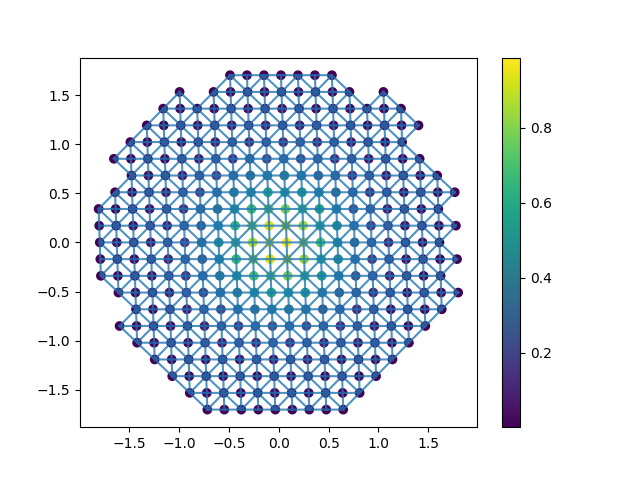

<IPython.core.display.Javascript object>


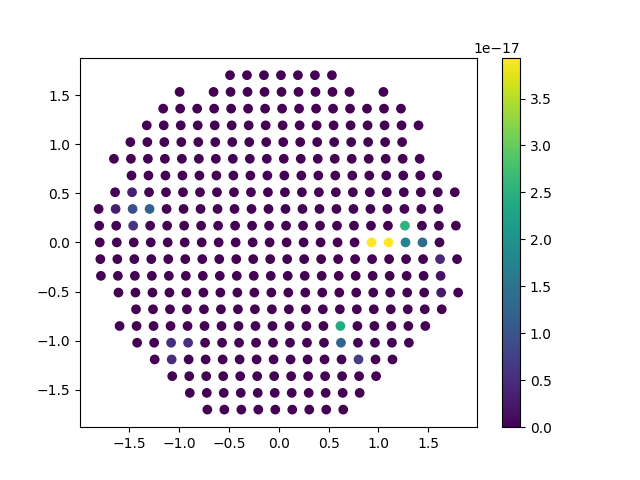

In [1266]:
intfun = plind.get_intfun()
xs = np.real(plind.contour.points[:,0])
ys = np.real(plind.contour.points[:,1])
intvals = np.array([intfun(p, lamb) for p in plind.contour.points])
triang = mtri.Triangulation(xs,ys,plind.contour.simplices)

plt.figure()
plt.scatter(xs, ys, c=intvals.real)
plt.triplot(triang, alpha=0.8)
plt.colorbar()
plt.show()


plt.figure()
plt.scatter(xs, ys, c=intvals.imag)
plt.colorbar()
plt.show()

In [35]:
plind.integrate()
print(plind.integral)
print(answer(lamb))

(-5.0399671516656884e-17+3.1371934216259283j)
3.141592653589793j


In [332]:
len(plind.contour.points)

394

<IPython.core.display.Javascript object>


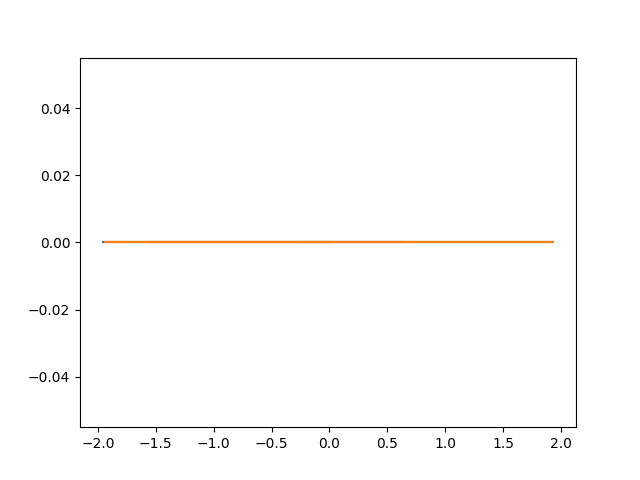

In [1175]:
plt.figure()
plt.plot(np.real(plind.contour.points[:,0]), (np.real(plind.contour.points[:,0])-np.imag(plind.contour.points[:,0])))
plt.plot(np.real(plind.contour.points[:,1]), (np.real(plind.contour.points[:,1])-np.imag(plind.contour.points[:,1])))
plt.show()

## Tester case

In [48]:
def plot_current(points, simplices, edges, bad_edges):
    plt.figure(figsize=(3,3))
    plt.tripcolor(points[:,0],points[:,1],simplices,np.ones(simplices.shape[0]),alpha=0.2)
    plt.scatter(points[:,0],points[:,1],alpha=0.5,color='k',zorder=20,s=200)
    for i, point in enumerate(points):
        plt.text(point[0]+0.05,point[1]+0.05,str(i),fontsize=20,zorder=100)
    for i in range(edges.shape[0]):
        plt.plot(points[edges[i]][:,0],points[edges[i]][:,1],color='b',lw=4,alpha=0.5)
    for i in range(bad_edges.shape[0]):
        plt.plot(points[bad_edges[i]][:,0],points[bad_edges[i]][:,1],color='r',ls='--')
    return
def init_testcase():
    points = np.array([[0.,0.],[1,0],[1,1],[0,1],[0,-1],[-1,1],[-1,-1],[0,2]])
    simplices = np.array([[0,1,2],[0,2,3],[4,1,0],[5,0,3],[5,0,4],[5,6,4],[7,3,2],[5,3,7]])
    edges = np.array([[0,1],[1,2],[0,2],[0,3],[0,4],[5,0],[3,5],[5,4],[4,6],[5,6],[7,3],[2,7],[5,7],[2,3],[1,4]])
    bad_edges = np.array([[0,2],[0,1],[0,5],[5,4],[5,6],[6,4],[3,7]])
    return points, simplices, edges, bad_edges

In [49]:
points, simplices, edges, bad_edges = init_testcase()

<IPython.core.display.Javascript object>


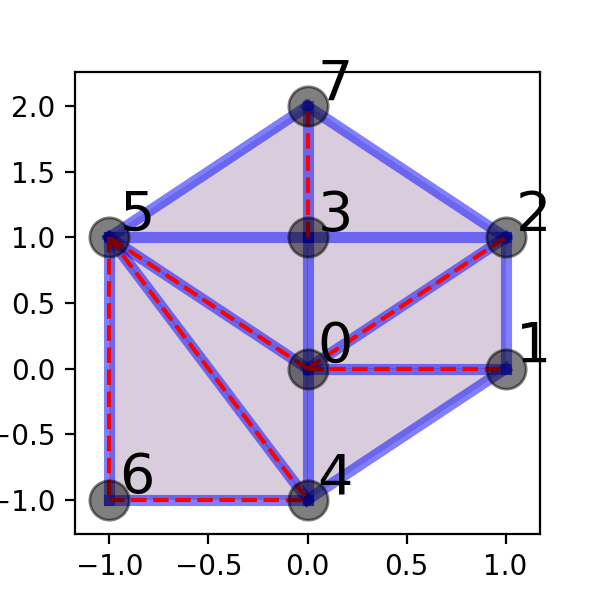

In [50]:
plot_current(points,simplices,edges,bad_edges)

In [51]:
used_simps = np.array([],dtype=np.int)
uni_bad_edges=np.array([],dtype=np.int)
uni_bad_simps=np.array([],dtype=np.int)
for i, bad_edge in enumerate(bad_edges):
    simplices_tag = np.count_nonzero(np.isin(simplices, bad_edge),axis=-1) > 1
    simplices_tag = np.where(simplices_tag)[0]
    if not np.any(np.in1d(simplices_tag,used_simps)): # Check if we have used this simplex
        # Flag simplices_tag to not reuse simplices
        used_simps = np.append(used_simps, simplices_tag)
        # Add edge to new bad edge array
        uni_bad_edges = np.append(uni_bad_edges, bad_edge)
        edges_tag = np.count_nonzero(np.isin(edges, bad_edge),axis=-1) == 2
        edges_tag = np.where(edges_tag)[0]
        edges = np.delete(edges, edges_tag, axis=0)
        # Add simplice(s) with the proper extras populated
        Ndim = np.size(simplices[0])-1
        for j in range(0,Ndim):
            if np.size(simplices_tag)>j:
                uni_bad_simps = np.append(uni_bad_simps,simplices[simplices_tag[j]], axis=0)
uni_bad_simps = uni_bad_simps.reshape(-1,3)
uni_bad_edges = uni_bad_edges.reshape(-1,2)

# used_simps conveniently tracks bad simplices after unifiquation
simplices = np.delete(simplices, used_simps, axis=0)


In [52]:
uni_bad_edges

array([[0, 2],
       [0, 5],
       [5, 6],
       [3, 7]])

<IPython.core.display.Javascript object>


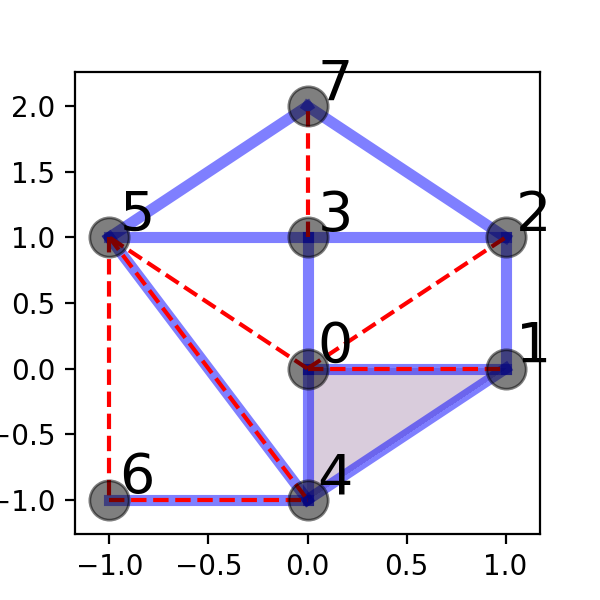

In [53]:
plot_current(points,simplices,edges,bad_edges)

<IPython.core.display.Javascript object>


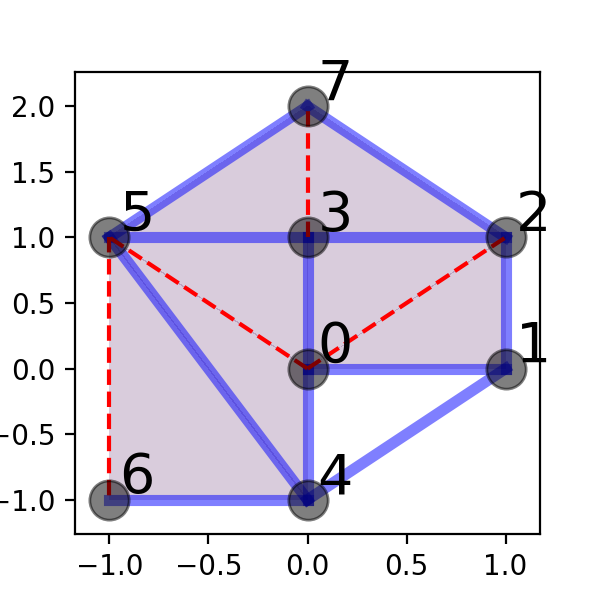

In [54]:
plot_current(points,uni_bad_simps,edges,uni_bad_edges)

In [55]:
# add points
midpts_ind = np.arange(np.shape(points)[0], np.shape(points)[0]+np.shape(uni_bad_edges)[0], 1)
midpts = (points[uni_bad_edges[:, 0]] + points[uni_bad_edges[:, 1]])/2
points = np.append(points, midpts, axis=0)

<IPython.core.display.Javascript object>


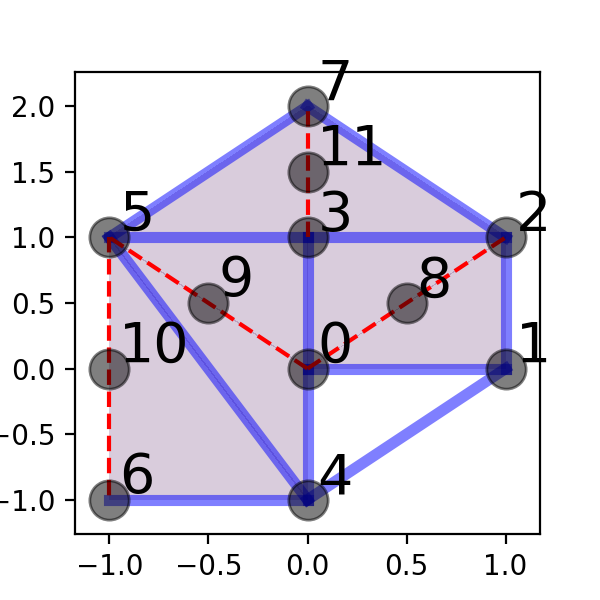

In [56]:
plot_current(points,uni_bad_simps,edges,uni_bad_edges)

In [39]:
midpts_ind

array([8])

In [13]:
uni_bad_edges

array([[0, 2],
       [0, 5],
       [5, 6],
       [3, 7]])

In [40]:
np.append(midpts_ind, uni_bad_edges[:, 0], axis=0).reshape(2,-1).T

array([[8, 0]])

In [41]:
np.append(midpts_ind, uni_bad_edges[:, 1], axis=0).reshape(2,-1).T

array([[8, 1]])

In [57]:
# add edges
edges_1 = np.sort(np.append(midpts_ind, uni_bad_edges[:, 0], axis=0).reshape(2,-1).T, axis=1)
# edges_1 = np.reshape(edges_1, [np.size(midpts_ind), 2])

edges_2 = np.sort(np.append(midpts_ind, uni_bad_edges[:, 1], axis=0).reshape(2,-1).T, axis=1)
# edges_2 = np.reshape(edges_2, [np.size(midpts_ind), 2])
edges = np.concatenate((edges, edges_1, edges_2), axis=0)
# edges = np.append(edges, edges_2, axis=0)

In [43]:
edges_1

array([[0, 8]])

<IPython.core.display.Javascript object>


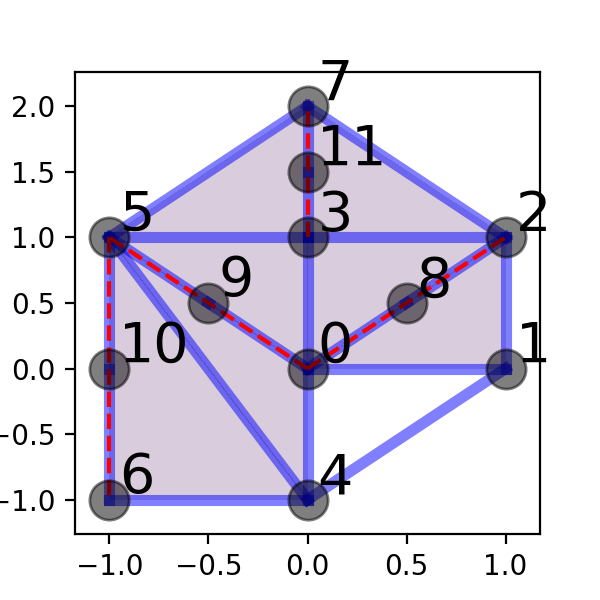

In [58]:
plot_current(points,uni_bad_simps,edges,uni_bad_edges)

In [59]:
# vertices which are not part of the bad edges in the bad simplices
# for i, bad_edge in enumerate(uni_bad_edges):
#     print(bad_simp_set[np.isin(bad_simp_set, bad_edge, invert=True) *
#                        (np.count_nonzero(np.isin(bad_simp_set, bad_edge, invert=True),axis=-1)==ndim+1-2)[:,np.newaxis]])
# vertices which are not part of the bad edges in the bad simplices
for i, bad_edge in enumerate(uni_bad_edges):
    # get all outliers for all simplices associated to the bad edge
    outliers = uni_bad_simps[np.isin(uni_bad_simps, bad_edge, invert=True) *
             (np.count_nonzero(np.isin(uni_bad_simps, bad_edge, invert=True), axis=-1)==2+1-2)[:, np.newaxis]]
    # ndim- 1 outliers will exist in every edge
    num_simps = int(np.size(outliers)/(2-1))
    num_outliers=np.size(outliers)
    outliers=np.reshape(outliers,[num_outliers,1])

    # add new edge for every outlier
    edges_outliers = np.sort(np.append(outliers, midpts_ind[i]*np.ones([num_outliers, 1], dtype=np.int),axis=1), axis=0)
    edges_outliers = edges_outliers.astype(np.int)
    edges = np.append(edges, edges_outliers, axis=0)

    outliers = np.reshape(outliers, [num_simps, 2-1])

    # Simplices per outlier row
    simp_1 = np.sort(np.append(np.append(outliers, midpts_ind[i]*np.ones([num_simps, 1], dtype=np.int), axis=1), bad_edge[0]*np.ones([num_simps, 1], dtype=np.int),      axis=1), axis=1)
    simp_2 = np.sort(np.append(np.append(outliers, midpts_ind[i]*np.ones([num_simps, 1], dtype=np.int), axis=1), bad_edge[1]*np.ones([num_simps, 1], dtype=np.int),      axis=1), axis=1)

    simplices = np.append(simplices, simp_1, axis=0)
    simplices = np.append(simplices, simp_2, axis=0)

<IPython.core.display.Javascript object>


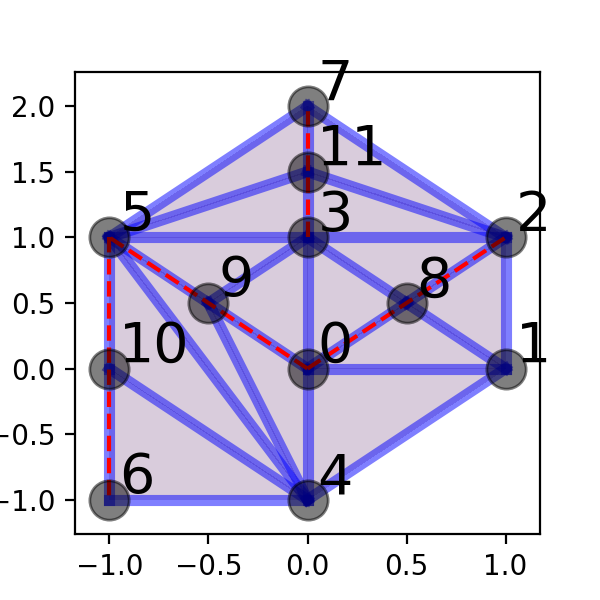

In [60]:
plot_current(points,simplices,edges,uni_bad_edges)

In [ ]:
edges = np.delete(edges, edges_tag, axis=0)

In [46]:
a = np.array([0,1])
b = np.array(2)

In [47]:
np.hstack((a[:,np.newaxis],np.repeat(b[:,np.newaxis],a.size,axis=0)))

IndexError: too many indices for array

In [22]:
(points - points[0])[1:].T

array([[ 1. ,  1. ,  0. ,  0. , -1. , -1. ,  0. ,  0.5, -0.5, -1. ,  0. ],
       [ 0. ,  1. ,  1. , -1. ,  1. , -1. ,  2. ,  0.5,  0.5,  0. ,  1.5]])

### vectorized over bad_edges

In [23]:
points, simplices, edges, bad_edges = init_test()
plot_current(points,simplices,edges,bad_edges)

NameError: name 'init_test' is not defined

In [24]:
simplices_tag = np.apply_along_axis(lambda bad_edge: np.isin(simplices,bad_edge), -1, bad_edges).sum(-1) > 1
uni_bad_simps = simplices[((np.apply_along_axis(lambda bad_edge: np.isin(simplices,bad_edge), -1, bad_edges).sum(-1) > 1).sum(0) <= 2)]
uni_bad_edges = np.unique(bad_edges[np.where(simplices_tag)[0]],axis=0)

In [25]:
uni_bad_edges = 

SyntaxError: invalid syntax (<ipython-input-25-cae90fc87f4d>, line 1)

In [26]:
(np.apply_along_axis(lambda bad_edge: np.isin(simplices,bad_edge), -1, bad_edges).sum(-1) == 1)

array([[ True],
       [False],
       [ True],
       [ True],
       [False],
       [ True],
       [False]])

In [27]:
np.logical_xor.reduce(simplices_tag,0)

array([ True])

In [28]:
simplices[simplices_tag.sum(0) >= 2]

array([], shape=(0, 3), dtype=int64)

<IPython.core.display.Javascript object>


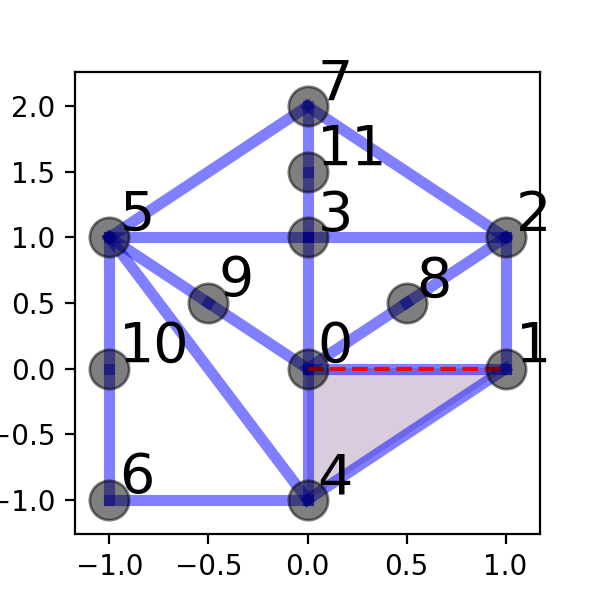

In [29]:
plot_current(points,uni_bad_simps,edges,uni_bad_edges)

In [30]:
simplices[(np.apply_along_axis(lambda bad_edge: np.isin(simplices,bad_edge), -1, bad_edges).sum(-1) > 1)[2]]

array([], shape=(0, 3), dtype=int64)

In [31]:
points.shape

(12, 2)

In [1999]:
np.apply_along_axis(lambda bad_edge: np.isin(simplices,bad_edge), -1, bad_edges).shape

(7, 8, 3)

In [ ]:
used_simps = np.array([],dtype=np.int)
uni_bad_edges=np.array([],dtype=np.int)
uni_bad_simps=np.array([],dtype=np.int)
for i, bad_edge in enumerate(bad_edges):
    simplices_tag = np.count_nonzero(np.isin(simplices, bad_edge),axis=-1) > 1
    simplices_tag = np.where(simplices_tag)[0]
    if not np.any(np.in1d(simplices_tag,used_simps)): # Check if we have used this simplex
        # Flag simplices_tag to not reuse simplices
        used_simps = np.append(used_simps, simplices_tag)
        # Add edge to new bad edge array
        uni_bad_edges = np.append(uni_bad_edges, bad_edge)
        edges_tag = np.count_nonzero(np.isin(edges, bad_edge),axis=-1) == 2
        edges_tag = np.where(edges_tag)[0]
        edges = np.delete(edges, edges_tag, axis=0)
        # Add simplice(s) with the proper extras populated
        Ndim = np.size(simplices[0])-1
        for j in range(0,Ndim):
            if np.size(simplices_tag)>j:
                uni_bad_simps = np.append(uni_bad_simps,simplices[simplices_tag[j]], axis=0)
uni_bad_simps = uni_bad_simps.reshape(-1,3)
uni_bad_edges = uni_bad_edges.reshape(-1,2)

# used_simps conveniently tracks bad simplices after unifiquation
simplices = np.delete(simplices, used_simps, axis=0)


### profiling

In [1918]:
def prof_func():
    points = np.array([[0.,0.],[1,0],[1,1],[0,1],[0,-1],[-1,1],[-1,-1],[0,2]])
    simplices = np.array([[0,1,2],[0,2,3],[4,1,0],[5,0,3],[5,0,4],[5,6,4],[7,3,2],[5,3,7]])
    edges = np.array([[0,1],[1,2],[0,2],[0,3],[0,4],[5,0],[3,5],[5,4],[4,6],[5,6],[7,3],[2,7],[5,7],[2,3],[1,4]])
    bad_edges = np.array([[0,2],[0,1],[0,5],[5,4],[5,6],[6,4],[3,7]])
    bad_points = np.array([6,7])
    # bad_edges_as_list = bad_edges.tolist()
    
    used_simps = np.array([],dtype=np.int)
    uni_bad_edges=np.array([],dtype=np.int)
    uni_bad_simps=np.array([],dtype=np.int)
    
    for i, bad_edge in enumerate(bad_edges):
        simplices_tag = np.isin(simplices,bad_edge).sum(-1) > 1
        simplices_tag = np.where(simplices_tag)[0]
#         print( simplices_tag in used_simps,np.any(np.in1d(simplices_tag,used_simps)) )
        if not np.any(np.in1d(simplices_tag,used_simps)): # Check if we have used this simplex
            # Flag simplices_tag to not reuse simplices
            used_simps = np.append(used_simps, simplices_tag)
            # Add edge to new bad edge array
            uni_bad_edges = np.append(uni_bad_edges, bad_edge)

#             edges_tag = np.count_nonzero(np.isin(edges, bad_edge), axis=-1) == 2
            edges_tag = np.isin(edges,bad_edge).sum(-1) > 1
            edges = edges[~(edges_tag)]
            # Add simplice(s) with the proper extras populated
            Ndim = np.size(simplices[0])-1
            for j in range(0,Ndim):
                if np.size(simplices_tag)>j:
                    uni_bad_simps = np.append(uni_bad_simps,simplices[simplices_tag[j]], axis=0)
    uni_bad_simps = uni_bad_simps.reshape(-1,3)
    uni_bad_edges = uni_bad_edges.reshape(-1,2)
    
    # add points
    midpts_ind = np.arange(np.shape(points)[0], np.shape(points)[0]+np.shape(uni_bad_edges)[0], 1)
    midpts = (points[uni_bad_edges[:, 0]] + points[uni_bad_edges[:, 1]])/2
    points = np.append(points, midpts, axis=0)
    
    #add edges
    edges_1 = np.sort(np.append(midpts_ind, uni_bad_edges[:, 0], axis=0).reshape(2,-1).T, axis=1)

    edges_2 = np.sort(np.append(midpts_ind, uni_bad_edges[:, 1], axis=0).reshape(2,-1).T, axis=1)
    edges = np.concatenate((edges, edges_1, edges_2), axis=0)


    # used_simps conveniently tracks bad simplices after unifiquation
    simplices = np.delete(simplices, used_simps, axis=0)

    
    # vertices which are not part of the bad edges in the bad simplices
    # for i, bad_edge in enumerate(uni_bad_edges):
    #     print(bad_simp_set[np.isin(bad_simp_set, bad_edge, invert=True) *
    #                        (np.count_nonzero(np.isin(bad_simp_set, bad_edge, invert=True),axis=-1)==ndim+1-2)[:,np.newaxis]])
    # vertices which are not part of the bad edges in the bad simplices
    for i, bad_edge in enumerate(uni_bad_edges):
        # get all outliers for all simplices associated to the bad edge
        outliers = uni_bad_simps[np.isin(uni_bad_simps, bad_edge, invert=True) *
                 (np.isin(uni_bad_simps, bad_edge, invert=True).sum(axis=-1)==2+1-2)[:, np.newaxis]]
        # ndim- 1 outliers will exist in every edge
        num_simps = int(np.size(outliers)/(2-1))
        num_outliers=np.size(outliers)
        outliers=np.reshape(outliers,[num_outliers,1])

        # add new edge for every outlier
        edges_outliers = np.sort(np.append(outliers, midpts_ind[i]*np.ones([num_outliers, 1], dtype=np.int),axis=1), axis=0)
        edges_outliers = edges_outliers.astype(np.int)
        edges = np.append(edges, edges_outliers, axis=0)

        outliers = np.reshape(outliers, [num_simps, 2-1])

        # Simplices per outlier row
#         print(midpts_ind[np.newaxis,i],outliers,bad_edge[0])
        simp_1 = np.sort(np.concatenate(( midpts_ind[i]*np.ones([num_simps, 1], dtype=np.int),outliers,bad_edge[0]*np.ones([num_simps, 1], dtype=np.int)),axis=1), axis=1)
        simp_2 = np.sort(np.concatenate(( midpts_ind[i]*np.ones([num_simps, 1], dtype=np.int),outliers,bad_edge[1]*np.ones([num_simps, 1], dtype=np.int)),axis=1), axis=1)

#         print(simp_1)
        simplices = np.concatenate((simplices, simp_1, simp_2), axis=0)
        return

In [1873]:
prof_func()

In [1919]:
%lprun -f prof_func prof_func()

In [1714]:
for i, bad_edge in enumerate(bad_edges):
    simplices_tag = np.count_nonzero(np.isin(simplices, bad_edge),axis=-1) > 1
    simplices_tag = np.where(simplices_tag)[0]
    print(simplices[simplices_tag])

[[0 1 2]
 [0 2 3]]
[[0 1 2]
 [4 1 0]]
[[5 0 3]
 [5 0 4]]
[[5 0 4]
 [5 6 4]]
[[5 6 4]]
[[5 6 4]]
[[7 3 2]
 [5 3 7]]


In [1713]:
simplices_tag = np.count_nonzero(np.isin(simplices, bad_edges[0]),axis=-1) > 1
simplices_tag = np.where(simplices_tag)[0]

In [1762]:
np.in1d(simplices_tag,[])

array([False, False])

In [1911]:
%timeit np.isin(simplices,bad_edges[4]).sum(-1) > 1

52.9 µs ± 1.1 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [1912]:
%timeit np.count_nonzero(np.isin(simplices,bad_edges[4]),axis=-1) > 1

66.5 µs ± 1.42 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [1902]:
%timeit (np.isin(simplices,bad_edges[0]) > 1) == True

44.1 µs ± 832 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [1906]:
np.isin(simplices,bad_edges[0])

array([[ True, False,  True],
       [ True,  True, False],
       [False, False,  True],
       [False,  True, False],
       [False,  True, False],
       [False, False, False],
       [False, False,  True],
       [False, False, False]])

## integration

In [615]:
def vol(points):
    ndim = points.shape[-1]
    mat = (points - points[0])[1:]
    if np.shape(mat) == (1,1):
        dV = np.sqrt(mat[0][0]**2)
    else:
        dV = np.sqrt(np.linalg.det(mat@mat))/np.math.factorial(ndim)
    return dV

In [616]:
integral = 0j
area = 0
for simp in plind.contour.simplices:
    mid = np.sum(plind.contour.points[simp], 0)/len(simp)
#     fmid = plind.intfun(plind.contour.points[simp][0], *plind.expargs) + plind.intfun(plind.contour.points[simp][1], *plind.expargs) + plind.intfun(plind.contour.points[simp][2], *plind.expargs)
#     fmid /= 3
    #     print(plind.intfun(mid, *plind.expargs))
    integral += plind.intfun(mid, *plind.expargs)*vol(plind.contour.points[simp])
#     print(plind.intfun(mid, *plind.expargs))
print(integral)

(1.2770691925256652+1.0216553540205315j)


In [617]:
answer(lamb)

(-1.2770701843860948-1.021656147508876j)

In [618]:
inte = 0
for simp in plind.contour.simplices:
    mid = np.sum(plind.contour.points[simp], 0)/len(simp)
    # compute volume element (this is very janky and not general at all)
    [p1, p0, p2] = plind.contour.points[simp]
    a = np.sqrt(np.sum((p0 - p1)**2))
    b = np.sqrt(np.sum((p1 - p2)**2))
    c = np.sqrt(np.sum((p2 - p0)**2))
    vol = np.sqrt((a+b+c)*(-a+b+c)*(a-b+c)*(a+b-c))/4
#     print(vol)
    inte += plind.intfun(mid, *plind.expargs)*vol
print(inte)

(1.2770691925256654+1.0216553540205315j)


In [619]:
inte = 0
for simp in plind.contour.simplices:
    mid = np.sum(plind.contour.points[simp], 0)/len(simp)
    # compute volume element (this is very janky and not general at all)
    [p0, p1, p2] = plind.contour.points[simp]
    base = np.sqrt(np.sum((p1-p0)**2))
    mid_pt = (p1+p0)/2
    height = np.sqrt(np.sum((p2-mid_pt)**2))
    #base = np.sum((p1-p0)*np.conj(p1-p0))
    #mid_pt = (p1+p0)/2
    #height = np.sum((p2-mid_pt)*np.conj(p2-mid_pt))
    vol = 0.5*base*height
#     print(vol)
    inte += plind.intfun(mid, *plind.expargs)*vol
print(inte)

(-1.2770723457790378-1.021657876623227j)


# sandbox

In [1539]:

def pre_allocate():
    results = np.empty(5000)
    for i in range(5000):
        results[i] = i**2
    return results

def list_append():
    results = []
    for i in range(5000):
        results.append(i**2)
    return np.array(results)


def array_append():
    results = arr.array('f',[])
    for i in range(5000):
        results.append(i**2)
    return np.array(results)


def numpy_append():
    results = np.array([])
    for i in range(5000):
        np.append(results, i**2)
    return results

In [1541]:
%timeit pre_allocate()

3.7 ms ± 102 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [1560]:
%timeit array_append()

4.39 ms ± 166 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [1543]:
%timeit list_append()

4.45 ms ± 162 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [1544]:
%timeit numpy_append()

80.8 ms ± 1.01 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [1564]:
ar = array_append()

In [1565]:
ar[:,np.newaxis].reshape(-1)

array([0.0000000e+00, 1.0000000e+00, 4.0000000e+00, ..., 2.4970008e+07,
       2.4980004e+07, 2.4990000e+07], dtype=float32)

In [1601]:
a = np.ones((10,10))

In [1605]:
%timeit a.flatten()

1.79 µs ± 29.4 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)


In [1635]:
a = np.arange(10000)

In [1637]:
%timeit np.arange(10000)

7.6 µs ± 564 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [1638]:
points = np.array([[0.,0.],[1,0],[1,1],[0,1],[0,-1],[-1,1],[-1,-1],[0,2]])
simplices = np.array([[0,1,2],[0,2,3],[4,1,0],[5,0,3],[5,0,4],[5,6,4],[7,3,2],[5,3,7]])
edges = np.array([[0,1],[1,2],[0,2],[0,3],[0,4],[5,0],[3,5],[5,4],[4,6],[5,6],[7,3],[2,7],[5,7],[2,3],[1,4]])
bad_edges = np.array([[0,2],[0,1],[0,5],[5,4],[5,6],[6,4],[3,7]])
bad_points = np.array([6,7])
# bad_edges_as_list = bad_edges.tolist()

In [1656]:
%%timeit
edges_tag = (np.count_nonzero(np.isin(edges, bad_edge), axis=-1) == 2)
edges_tag = np.where(edges_tag)[0]
np.delete(edges, edges_tag, axis=0)

168 µs ± 5.71 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [1668]:
%%timeit
edges_tag = (np.count_nonzero(np.isin(edges, bad_edge), axis=-1) == 2)
# edges_tag = np.where(edges_tag)[0]
edges[~(edges_tag)]

99.3 µs ± 8.89 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [1655]:
edges[np.invert(edges_tag)]

array([[0, 1],
       [1, 2],
       [0, 2],
       [0, 3],
       [0, 4],
       [5, 0],
       [3, 5],
       [5, 4],
       [4, 6],
       [5, 6],
       [2, 7],
       [5, 7],
       [2, 3],
       [1, 4]])

In [1664]:
edges_tag = (np.count_nonzero(np.isin(edges, bad_edge), axis=-1) == 2)
edges_tag = np.where(edges_tag)[0]
np.delete(edges, edges_tag, axis=0)

array([[0, 1],
       [1, 2],
       [0, 2],
       [0, 3],
       [0, 4],
       [5, 0],
       [3, 5],
       [5, 4],
       [4, 6],
       [5, 6],
       [2, 7],
       [5, 7],
       [2, 3],
       [1, 4]])

In [1669]:
edges_tag = (np.count_nonzero(np.isin(edges, bad_edge), axis=-1) == 2)
# edges_tag = np.where(edges_tag)[0]
edges[~(edges_tag)]

array([[0, 1],
       [1, 2],
       [0, 2],
       [0, 3],
       [0, 4],
       [5, 0],
       [3, 5],
       [5, 4],
       [4, 6],
       [5, 6],
       [2, 7],
       [5, 7],
       [2, 3],
       [1, 4]])

In [1801]:
%%timeit
simp_1 = np.sort(np.concatenate(( midpts_ind[0]*np.ones([num_simps, 1], dtype=np.int),outliers,bad_edge[0]*np.ones([num_simps, 1], dtype=np.int)),axis=1), axis=1)
simp_2 = np.sort(np.concatenate(( midpts_ind[0]*np.ones([num_simps, 1], dtype=np.int),outliers,bad_edge[1]*np.ones([num_simps, 1], dtype=np.int)),axis=1), axis=1)


318 µs ± 45.5 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [1802]:
%%timeit
simp_1 = np.sort(np.append(np.append(outliers, midpts_ind[0]*np.ones([num_simps, 1], dtype=np.int), axis=1), bad_edge[0]*np.ones([num_simps, 1], dtype=np.int),      axis=1), axis=1)
simp_2 = np.sort(np.append(np.append(outliers, midpts_ind[0]*np.ones([num_simps, 1], dtype=np.int), axis=1), bad_edge[1]*np.ones([num_simps, 1], dtype=np.int),      axis=1), axis=1)


402 µs ± 47.4 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [1920]:
a = np.arange(10000)

In [1921]:
%timeit np.sum(a)

20.9 µs ± 869 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [1922]:
%timeit a.sum()

15.3 µs ± 246 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [1943]:
simprep = np.repeat(simplices[np.newaxis,...],bad_edges.shape[0],axis=0)

In [1945]:
simprep = np.repeat(simplices[np.newaxis,...],bad_edges.shape[0],axis=0)

In [1960]:
def in_simplices(bad_edge):
    return np.isin(simplices,bad_edge)

array([[2, 2, 1, 1, 1, 0, 1, 0],
       [2, 1, 2, 1, 1, 0, 0, 0],
       [1, 1, 1, 2, 2, 1, 0, 1],
       [0, 0, 1, 1, 2, 2, 0, 1],
       [0, 0, 0, 1, 1, 2, 0, 1],
       [0, 0, 1, 0, 1, 2, 0, 0],
       [0, 1, 0, 1, 0, 0, 2, 2]])

In [1968]:
np.apply_along_axis(in_simplices,0,bad_edges)

array([[[ True, False],
        [False,  True],
        [False,  True]],

       [[ True, False],
        [False,  True],
        [ True, False]],

       [[False,  True],
        [False,  True],
        [ True, False]],

       [[ True,  True],
        [ True, False],
        [ True, False]],

       [[ True,  True],
        [ True, False],
        [False,  True]],

       [[ True,  True],
        [ True,  True],
        [False,  True]],

       [[False,  True],
        [ True, False],
        [False,  True]],

       [[ True,  True],
        [ True, False],
        [False,  True]]])

In [133]:
a = np.random(2,size=100)

TypeError: 'module' object is not callable

215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51


In [130]:
np.random.randint?

In [270]:
def ptlens(z, lamb):
    return 2j*np.pi*lamb*((z[0]**2+z[1]**2)-1/(1+z[0]**2+2*z[1]**2))

def gradh(z, lamb):
    return 1j*lamb*(np.conj(z)-(1/(1+z[:,0].conj()**2+2*z[:,1].conj()**2)[:,np.newaxis])**2*np.concatenate((2*z[:,0,np.newaxis].conj(),4*z[:,1,np.newaxis]),axis=-1))


NameError: name 'x' is not defined